# Predicting Used Car Prices Using Machine Learning: A Comparative Study of Machine Learning Algorithms

The objectives of this project include the following

1.)To compare the predictive accuracy and performance of Linear Regression, XGBoost, and Neural Networks in estimating used car prices, 

2.) To identify top 5 key features that significantly influence car price predictions.

3.) To evaluate the performance of each machine learning algorithm using cross-validation techniques ensuring robust and reliable predictions across different data samples.


### The Dataset

This dataset contains 12 variables that capture various aspects of vehicle specifications and history. 
These variables fall into two main categories: 3 numerical variables and 9 categorical variables.


Brand & Model: Identify the brand and specific model of each vehicle, essential for understanding its identity and features.
    
Model & Year: Record the manufacturing year, which is critical for assessing depreciation, technology advancements, and relevance.
    
Mileage: Note the vehicle’s mileage, a primary indicator of usage, wear, and potential maintenance needs.
    
Fuel Type: Capture the fuel type, such as gasoline, diesel, electric, or hybrid, providing insight into energy efficiency and environmental impact.
    
Engine Type: Describe engine specifications, offering details on performance, power, and fuel efficiency.
    
Transmission: Specify the transmission type, whether automatic, manual, or another variant, influencing driving experience and vehicle control.
    
Exterior & Interior Colors: Examine the aesthetic details, including exterior and interior color options that reflect the vehicle’s style.
    
Accident History: Indicate if the vehicle has a prior accident or damage history, vital for evaluating condition and making an informed purchase.
    
Clean Title: Confirm the availability of a clean title, which impacts the vehicle's resale value, ownership history, and legal standing.
    
Price: List the vehicle's price, helping with budgeting and comparing options within a specified range.

In [1]:
# Importing the libaries I need for this project

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Reading in the dataset
car = pd.read_csv(r"C:\Users\USER\Downloads\used_cars.csv")

car.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


###  Exploring the data to understand it

In [3]:
# Data Overview
car.info() # from the overview, I can deduce that there is data format issues as well as missing values . 
# for example, the price is out to be in numerical format but we have it in categorical format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
# Checking for the missing values
car.isnull().sum() # We have missing values in the fuel type, accident and clean_title variable

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [5]:
# Checking for duplicates
car.duplicated().sum() # We have no missing values

0

In [6]:
# Checking the fuel_type column
car['fuel_type'].value_counts()

Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: fuel_type, dtype: int64

In [7]:
# understanding the accident column
car['accident'].value_counts()

None reported                             2910
At least 1 accident or damage reported     986
Name: accident, dtype: int64

In [8]:
# understanding the clean_title column
car['clean_title'].value_counts()

Yes    3413
Name: clean_title, dtype: int64

# Data Cleaning 

As in the dataset, the dataset  has issues with inconsistent values in "Accident" and "Clean Title" columns, mixed units in "Milage," missing values, inconsistent capitalization and formatting of column names, mixed units in "Engine," and currency symbols in "Price," all of which should be standardized for clarity and analysis.


In [9]:
# Filling the missing values in the fuel type
car['fuel_type'].fillna('not supported',inplace=True)
car['fuel_type'] =car['fuel_type'].replace('–', 'not supported')

# Check the value counts to confirm the replacement
print(car['fuel_type'].value_counts())

Gasoline          3309
not supported      217
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
Name: fuel_type, dtype: int64


In [10]:
# Filling the missing values in the accident column
car['accident'].fillna('None reported',inplace=True)
car['accident'].value_counts()

None reported                             3023
At least 1 accident or damage reported     986
Name: accident, dtype: int64

In [11]:
# Filling the missing values in the clean column
car['clean_title'].fillna('no',inplace=True)
car['clean_title'].value_counts()
car['clean_title'].value_counts()

Yes    3413
no      596
Name: clean_title, dtype: int64

In [12]:
# Removing ' mi.' and commas in 'milage' column, then convert to numeric
car['milage'] = car['milage'].str.replace(' mi.', '').str.replace(',', '').astype(float)

In [13]:
# Remove '$' and commas in 'price' column, then convert to numeric
car['price'] = car['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [14]:
# Extract horsepower from 'engine' column using regex and convert to numeric
car['horsepower'] = car['engine'].str.extract(r'(\d{2,4}\.?\d*)HP').astype(float)

In [15]:
# Standardize the transmission column

# Creating a function to group the classes into automatic, manual and others
def clean_transmission(value):
    value = str(value).lower()
    if 'automatic' in value or 'a/t' in value:
        return 'Automatic'
    elif 'manual' in value:
        return 'Manual'
    else:
        return 'Others'

# Apply the function to the transmission column
car['transmission'] = car['transmission'].apply(clean_transmission)

# Check the cleaned value counts
print(car['transmission'].value_counts())

Automatic    3148
Others        846
Manual         15
Name: transmission, dtype: int64


In [16]:
# standardize the int_col (interior color) and ext_col (exterior color) columns in the car

def base_color (df):
    base_colors= [
        'black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
         'orange', 'yellow']
    car['int_col'] = car['int_col'].str.lower()
    car['ext_col'] = car['ext_col'].str.lower()

    def find_color(text):
        for color in base_colors:
            if color in text :
                return color
        return 'other'    
        
    car['int_col'] = car['int_col'].apply(find_color)
    car['ext_col'] = car['ext_col'].apply(find_color)
    
    return car
car= base_color(car)

In [17]:
# filling missing values in the horsepower column

car['horsepower'].fillna(car['horsepower'].mean(),inplace=True)

In [18]:
# Create a new column for car age based on the current year (2024)
car['age'] = 2024 - car['model_year']

In [19]:
# Display the cleaned data
car.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,age
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,black,black,At least 1 accident or damage reported,Yes,10300.0,300.000000,11
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,Automatic,other,gray,At least 1 accident or damage reported,Yes,38005.0,332.206498,3
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,blue,black,None reported,no,54598.0,332.206498,2
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,Automatic,black,black,None reported,Yes,15500.0,354.000000,9
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,Automatic,white,black,None reported,no,34999.0,332.206498,3


# Exploratory Data Analysis (EDA) 
After cleaning the data, I wil perform  univariate, bivariate, and multivariate analysis to uncover various insights on the data

In [20]:
# Summary Statistics
# Display summary statistics for 'milage', 'price', and 'age'
print("\nSummary Statistics:\n", car[['milage', 'price', 'age']].describe())


Summary Statistics:
               milage         price          age
count    4009.000000  4.009000e+03  4009.000000
mean    64717.551010  4.455319e+04     8.484410
std     52296.599459  7.871064e+04     6.104816
min       100.000000  2.000000e+03     0.000000
25%     23044.000000  1.720000e+04     4.000000
50%     52775.000000  3.100000e+04     7.000000
75%     94100.000000  4.999000e+04    12.000000
max    405000.000000  2.954083e+06    50.000000


This dataset after been cleaned contains 4009 vehicles shows a wide range in mileage, price, and age, reflecting mostly older, used cars. The average mileage is around 64,717 miles, with a range from 100 to 405,000 miles, while prices vary broadly from 2,000 to nearly 3 million, averaging around $44,553, indicating a mix of budget to luxury vehicles. The cars have an average age of about 8.4 years, with most vehicles under 12 years old, though some are as old as 50 years.

# Univariate Analysis

Performing Univariate analysis to understanding the distribution and frequency of individual variables.


Text(0, 0.5, 'Frequency')

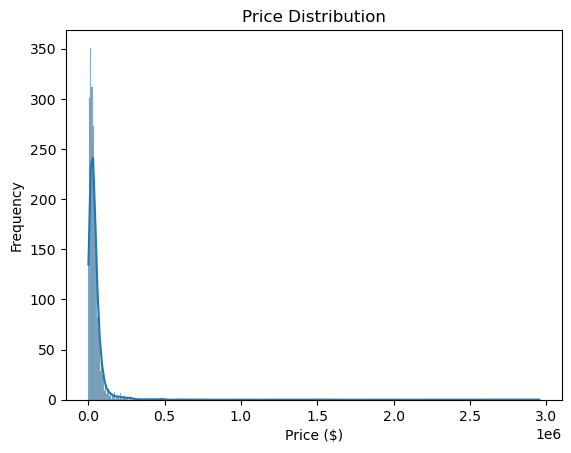

In [21]:
# Plot distributions for price, milage, and model year to understand data spread and outliers
# Price distribution
sns.histplot(car['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

The price distribution is heavily right-skewed, with most vehicles priced at the lower end of the range, while a few high-end or luxury vehicles significantly increase the upper range, causing the long tail. This indicates that the dataset contains many affordable vehicles and a few very expensive ones.

Text(0, 0.5, 'Frequency')

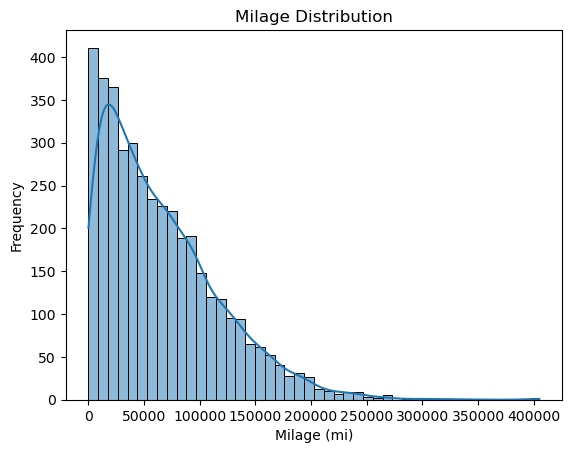

In [22]:
# Milage distribution
sns.histplot(car['milage'], kde=True)
plt.title('Milage Distribution')
plt.xlabel('Milage (mi)')
plt.ylabel('Frequency')


The mileage distribution is right-skewed, indicating that most vehicles have lower mileage, with the frequency decreasing as mileage increases. This suggests that the dataset includes many relatively low-mileage vehicles, while high-mileage vehicles are less common.

Text(0, 0.5, 'Frequency')

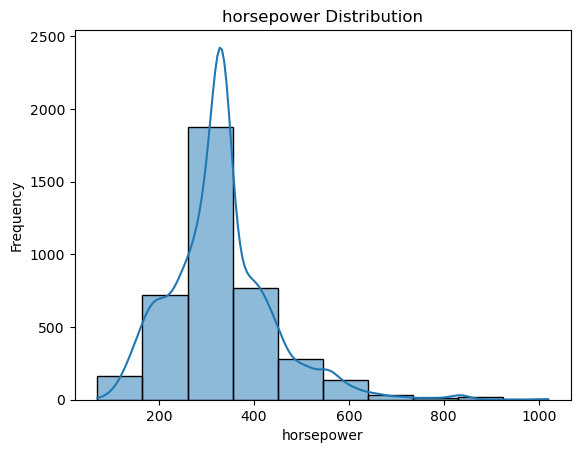

In [23]:
# horsepower distribution
sns.histplot(car['horsepower'], bins=10, kde=True)
plt.title('horsepower Distribution')
plt.xlabel('horsepower')
plt.ylabel('Frequency')

The histogram shows a right-skewed distribution with most of the horsepower data concentrated around 300–400, indicating this range is the most frequent. There is a long tail extending toward higher values, suggesting the presence of a few larger values that occur less frequently

Text(0, 0.5, 'Frequency')

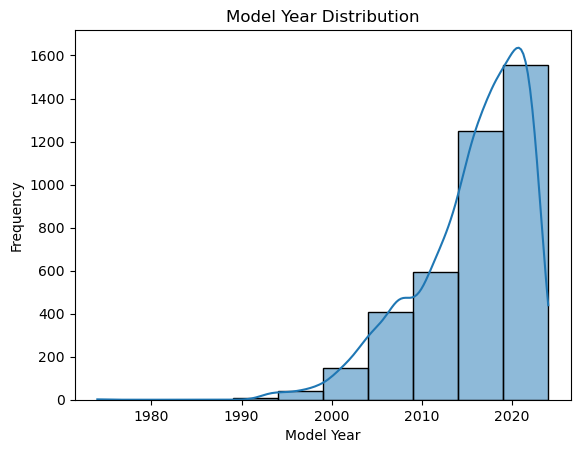

In [24]:
# Model year distribution
sns.histplot(car['model_year'], bins=10, kde=True)
plt.title('Model Year Distribution')
plt.xlabel('Model Year')
plt.ylabel('Frequency')

The model year distribution shows a right-skewed pattern, with the majority of vehicles being from more recent years, especially between 2010 and 2020. The frequency peaks around 2020, indicating that most vehicles in the dataset are relatively new. There are fewer older vehicles from before 2000, suggesting a trend towards more recent models in the dataset.

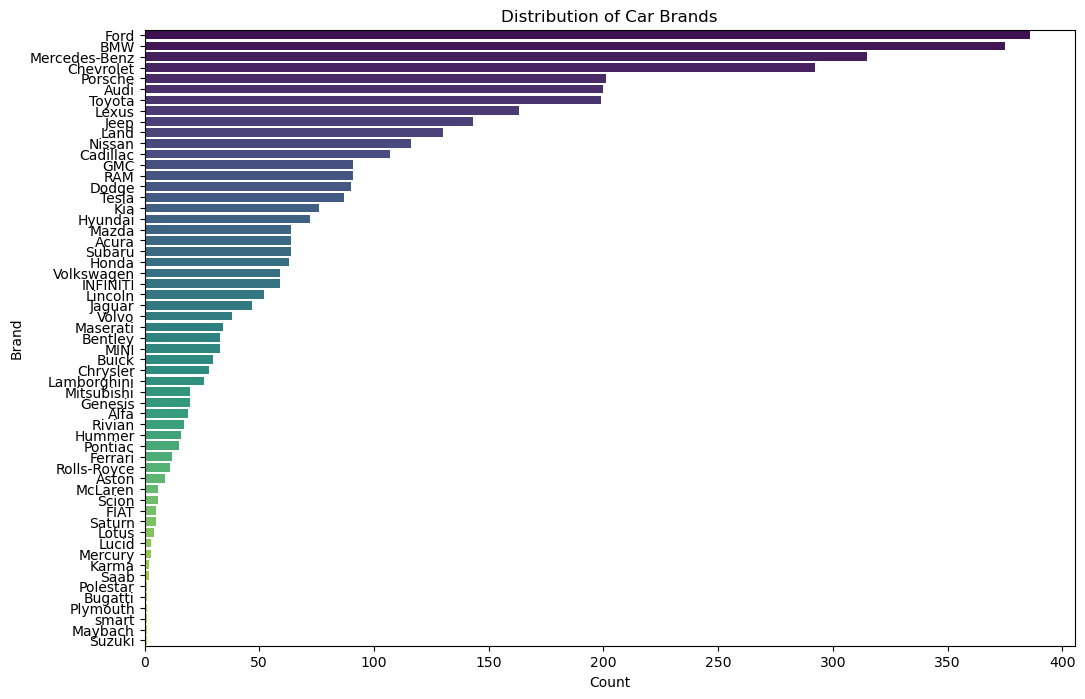

In [25]:
# Count plot for 'brand' to see the distribution of car brands
plt.figure(figsize=(12, 8))
sns.countplot(y='brand', data=car, order=car['brand'].value_counts().index, palette="viridis")
plt.title('Distribution of Car Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

The chart illustrates the distribution of various car brands, showcasing the count of each brand on the horizontal axis and the brand names listed vertically. Ford leads with the highest count, followed by Mercedes-Benz, Chevrolet and Porsche , indicating their popularity or presence in the dataset. On the other end, brands like Suzuki, Maybach, and smart have the lowest counts, suggesting a smaller representation

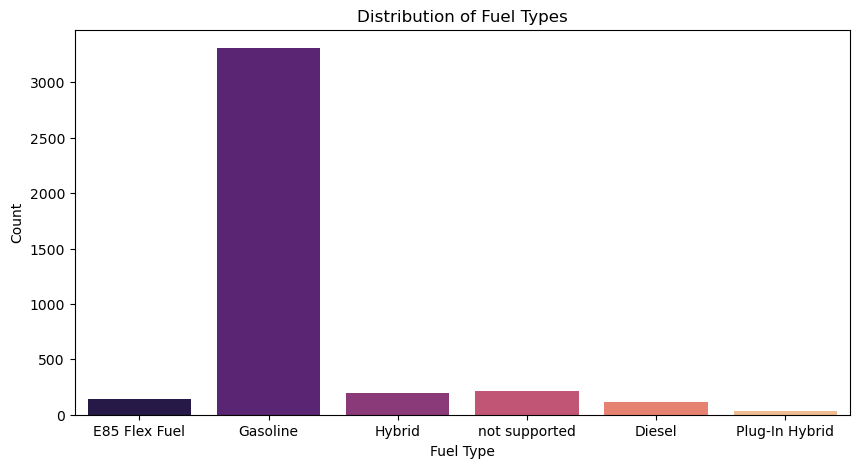

In [26]:
# Count plot for 'fuel_type' to see distribution across different fuel types
plt.figure(figsize=(10, 5))
sns.countplot(x='fuel_type', data=car, palette="magma")
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

The chart showcases the distribution of fuel types among vehicles in the dataset. "Gasoline" is the dominant fuel type, with a count exceeding 3,000, indicating its overwhelming prevalence. Other fuel types, such as "E85 Flex Fuel," "Hybrid," and "Diesel," have significantly smaller counts, highlighting their limited presence in the dataset. The "Plug-In Hybrid" category has the lowest count, while the "not supported" category is also minimal, indicating rare or uncommon entries. This distribution suggests that the dataset primarily focuses on gasoline-powered vehicles, with alternative fuel types being less represented.

# Bivariate Analysis

Performing Bivariate analysis to explore the relationship between two variables

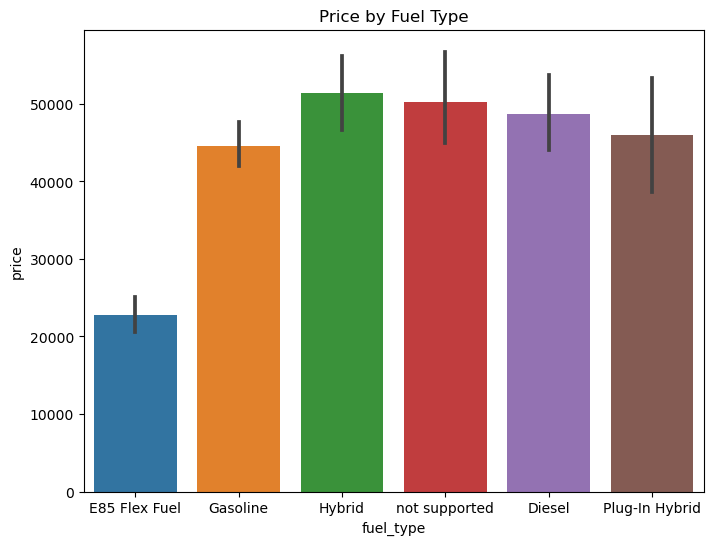

In [27]:
# Barplot of Price by Fuel Type
plt.figure(figsize=(8, 6))
sns.barplot(data=car, x='fuel_type', y='price')
plt.title('Price by Fuel Type')
plt.show()

The bar plot shows that cars with Hybrid have higher prices compared to other fuel types. In contrast, vehicles with  "E85 Flex Fuel" types tend to have the lowest average prices, indicating a potential trend where hybrids  vehicles are more valued in terms of price. The variation in price among fuel types suggests that fuel type could be a significant factor influencing car prices.

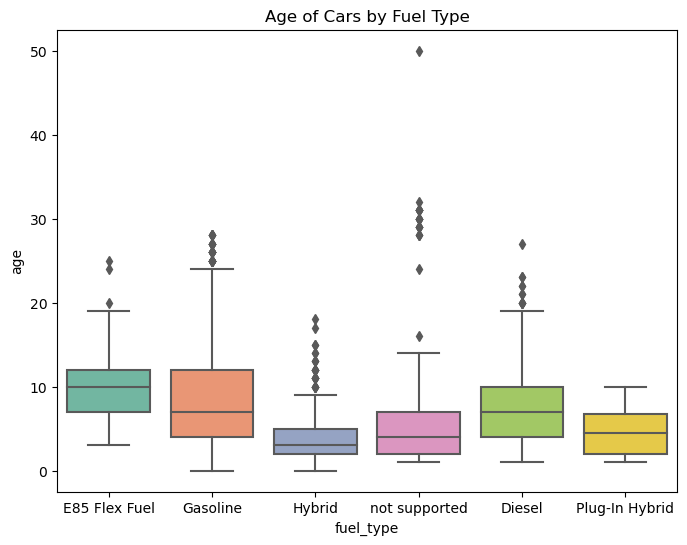

In [28]:
# Box Plot Age by Fuel Type distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel_type', y='age', data=car, palette='Set2')
plt.title('Age of Cars by Fuel Type')
plt.show()

The plot highlights that hybrid have the lowest median ages among all fuel types. In comparison to other fuel types Hybrid vehicles are generally younger than gasoline, diesel, and E85 Flex Fuel cars, which have higher median ages and larger age ranges.


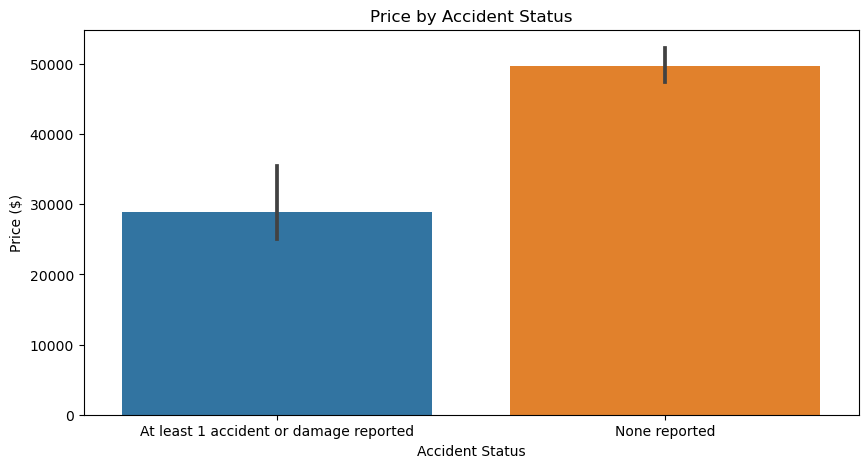

In [29]:

# Bar plot of Price by Accident Status to see how accidents impact car prices
plt.figure(figsize=(10, 5))
sns.barplot(x='accident', y='price', data=car)
plt.title('Price by Accident Status')
plt.xlabel('Accident Status')
plt.ylabel('Price ($)')
plt.show()

The bar plot indicates that cars with no reported accidents generally have a higher average price compared to those with at least one reported accident or damage. This suggests that accident history is a factor that tends to decrease vehicle value, as buyers likely perceive accident-free vehicles as more desirable.

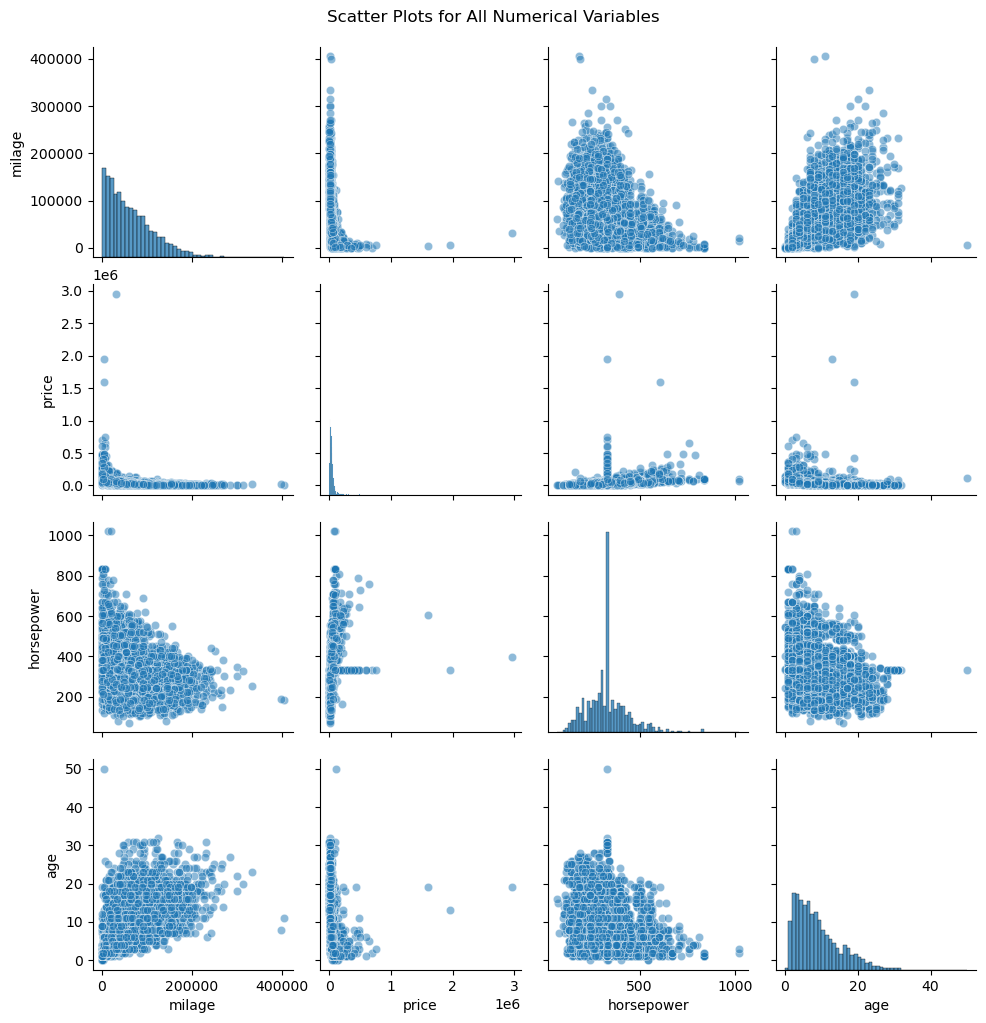

In [30]:
# Select numerical columns only for the pairplot
numerical_cols = ['milage', 'price', 'horsepower', 'age']

# Create pairplot for all numerical columns
sns.pairplot(car[numerical_cols], diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plots for All Numerical Variables', y=1.02)
plt.show()

Mileage and Price: There is an inverse relationship between mileage and price, suggesting that vehicles with higher mileage tend to have lower prices. This is expected as vehicles with more miles are often perceived as having more wear and tear.

Horsepower and Price: A positive correlation is observed between horsepower and price. Vehicles with higher horsepower generally have higher prices, likely due to their performance features and engine power.

Age and Mileage: As expected, there is a positive correlation between age and mileage, indicating that older vehicles typically have more miles driven.

Age and Price: There is an inverse relationship between age and price, suggesting that older vehicles tend to be less expensive, which aligns with the depreciation of vehicle value over time.

# Multivariate analysis

Performing Multivariate analysis to explore the relationship between two or more variables

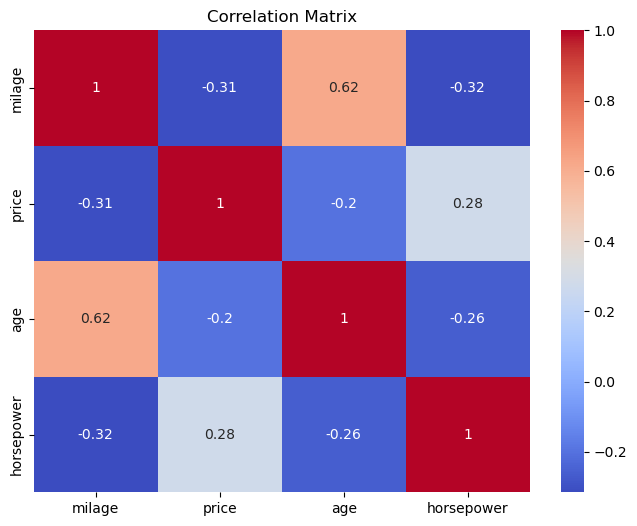

In [31]:
# Correlation Analysis
# Correlation heatmap to identify relationships between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(car[['milage', 'price', 'age', 'horsepower']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Mileage and Age: There is a moderately positive correlation (0.62) between mileage and age, indicating that older cars tend to have higher mileage, as expected.

Price and Horsepower: There is a weak positive correlation (0.28) between price and horsepower, suggesting that vehicles with higher horsepower generally have higher prices.

Price and Mileage: There is a weak negative correlation (-0.32) between price and mileage, meaning that vehicles with higher mileage tend to have slightly lower prices, reflecting depreciation.

Price and Age: There is a weak negative correlation (-0.2) between price and age, which aligns with the idea that older vehicles tend to be valued lower.

Mileage and Horsepower: There is a weak negative correlation (-0.32) between mileage and horsepower, suggesting that vehicles with higher mileage may have lower horsepower, potentially reflecting less powerful engines in older, high-mileage cars.

# Data Preprocessing

After cleaning and performing EDA, I will now move on to preprocessing to ensure the data is suitable for model building

In [32]:
# Removing outliers in the Price  Variable Using Zscore method

# calculating the mean, std of the Mileage
price_mean = car['price'].mean()
price_std = car['price'].std()

# calculating the cutoff for Zscore
price_cutoff = price_std*3

# specifying the lower and upper threshold for Zscore
lower, upper = price_mean - price_std, price_mean + price_std

car = car[(car['price'] < upper) & (car['price'] > lower)]


In [33]:
# Resetting the index
car.reset_index(drop=True, inplace=True)
car.shape

(3835, 14)

In [34]:
# Dropping reducdant columns that i will not be using

car.drop(['model', 'model_year', 'engine'], axis=1, inplace=True)

In [35]:
# Transforming the milage column to address the skewness of the data using log transformation

car['milage'] = np.log(car['milage'])

In [36]:
# Transforming the horsepower column to address the skewness of the data

car['horsepower'] = np.log(car['horsepower'])

In [37]:
# Transforming the horsepower column to address the skewness of the data

car['price'] = np.log(car['price'])

In [38]:
# Encoding the categorical columns
cat_col=['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

car_enc = pd.get_dummies(car, cat_col, drop_first=True)

car_enc.head()

,milage,price,horsepower,age,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Buick,...,int_col_gray,int_col_green,int_col_orange,int_col_other,int_col_red,int_col_silver,int_col_white,int_col_yellow,accident_None reported,clean_title_no
0,10.839581,9.239899,5.703782,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.455705,10.545473,5.805757,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,10.015565,10.907753,5.805757,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,11.395267,9.648595,5.869297,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,9.193703,10.463075,5.805757,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [39]:
# Separating the data into independent and target variable

x= car_enc.drop('price', axis=1)
y = car_enc['price'] 

In [40]:
# # Splitting the Data into Training and Testing Sets 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [41]:
# Normalizing the Data to be on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Model

After preparing and preprocessing the data, i will now move to the next step which is constructing the models using the 3 algorithms:

Linear Regression,

XGBoost, and 

Neural Networks   

### Linear Regression Using  Cross-Validation

In [42]:
# Constructing the Linear Regression Model.

# Creating the Linear Regression model
linear_model = LinearRegression()

# Perform cross-validation on the training set
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the mean of the cross-validation scores
cv_mse = -cv_scores.mean()
cv_rmse = np.sqrt(cv_mse)

print("Cross-Validation Mean MSE:", cv_mse)
print("Cross-Validation RMSE:", cv_rmse)

Cross-Validation Mean MSE: 3.965091724447115e+24
Cross-Validation RMSE: 1991253807139.39


### Performance and Evaluation of the Linear Model on the test data (20%)

After completing cross-validation, fit the model on the full training set (80%) and evaluate it on the test set (20%).

In [43]:
# Fit the model on the training data (80%)
linear_model.fit(X_train_scaled, y_train)

# Predicting on the test data,  exponentiate the result to return to original scale
y_test_pred = linear_model.predict(X_test_scaled)

# Evaluating the model using R² Score
r2 = r2_score(y_test, y_test_pred)

# Evaluating the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)

# Evaluating the model using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [44]:
print("linear Test Set R² Score:", r2 * 100)
print("linear Test Set Mean Absolute Error (MAE):", mae)
print("linear Test Set Root Mean Squared Error (RMSE):", rmse)

linear Test Set R² Score: 78.17296072493954
linear Test Set Mean Absolute Error (MAE): 0.2653565697203696
linear Test Set Root Mean Squared Error (RMSE): 0.3511358442311264


### XGBoost model Using Cross-Validation

In [45]:
# Constructing the XGBoost model
xgb_model = XGBRegressor()

# Performing Cross-Validation
xgb_cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the mean of the cross-validation scores
xgb_cv_scores_mean = -xgb_cv_scores.mean()
xgb_cv_rmse = np.sqrt(xgb_cv_scores_mean)


print("Cross-Validation Mean MSE:", xgb_cv_scores_mean)
print("Cross-Validation RMSE:", xgb_cv_rmse)


Cross-Validation Mean MSE: 0.09378323073079267
Cross-Validation RMSE: 0.3062404785961397


### Performance and Evaluation of the XGBoost Model on the test data (20%)

After completing cross-validation, fit the Xgboost model on the full training set (80%) and evaluate it on the test set (20%).

In [46]:
# Create and fit the XGBoost model
xgb_model.fit(X_train_scaled, y_train)

# Predicting on the test data, exponentiate the result to return to the original scale
xg_test_pred = xgb_model.predict(X_test_scaled)

# Evaluating the model using R² Score
xg_r2 = r2_score(y_test, xg_test_pred)

# Evaluating the model using Mean Absolute Error (MAE)
xg_mae = mean_absolute_error(y_test, xg_test_pred)

# Evaluating the model using Root Mean Squared Error (RMSE)
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_test_pred))

In [47]:
# Print the Xgboost evaluation metrics
print("XGBoost R² Score:", xg_r2 )
print("XGBoost Mean Absolute Error (MAE):", xg_mae)
print("XGBoost Root Mean Squared Error (RMSE):", xg_rmse)

XGBoost R² Score: 0.8430568702167766
XGBoost Mean Absolute Error (MAE): 0.21915558250182912
XGBoost Root Mean Squared Error (RMSE): 0.29774803530837257


### Neural Network Using Cross-Validation

In [48]:
# Constructing the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=10)

# Performing Cross-Validation
mlp_cv_scores = cross_val_score(mlp_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculating the mean of the cross-validation scores
mlp_cv_scores_mean = -mlp_cv_scores.mean()
mlp_cv_remse = cv_rmse = np.sqrt(mlp_cv_scores_mean )



print("Cross-Validation Mean MSE:", mlp_cv_scores_mean)
print("Cross-Validation RMSE:", mlp_cv_remse)

Cross-Validation Mean MSE: 1.7014822107886107
Cross-Validation RMSE: 1.304408759089194


### Performance and Evaluation of the Neural Network Model on the test data (20%)

After completing cross-validation, fit the neural network model on the full training set (80%) and evaluate it on the test set (20%).

In [49]:
# fitting the Neural Network model to learn the data
mlp_model.fit(X_train_scaled, y_train)

# Predicting on the test data
nn_test_pred = mlp_model.predict(X_test_scaled)

# Evaluating the model using R² Score
nn_r2 = r2_score(y_test, nn_test_pred)

# Evaluating the model using Mean Absolute Error (MAE)
nn_mae = mean_absolute_error(y_test, nn_test_pred)

# Evaluating the model using Root Mean Squared Error (RMSE)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_test_pred))

# Print the evaluation metrics
print("Neural Network R² Score:", nn_r2)
print("Neural Network Mean Absolute Error (MAE):", nn_mae)
print("Neural Network Root Mean Squared Error (RMSE):", nn_rmse)

Neural Network R² Score: 0.5821230764022786
Neural Network Mean Absolute Error (MAE): 0.32045672519828544
Neural Network Root Mean Squared Error (RMSE): 0.4858497060373096


###  Finding the top most important features for each variable  using Recursive Feature Elimination and Permutation Importance Technique

In [50]:
# Applying RFE for feature selection using a Linear Regression model
rfe_lr = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe_lr.fit(X_train_scaled, y_train)

# Displaying the names of the 5 most important features selected by RFE
x.columns[rfe_lr.support_]

# Viewing the first few rows of the selected top 5 features from the training dataset
X_train.iloc[:, rfe_lr.support_].head()

,milage,horsepower,age,brand_Porsche,fuel_type_not supported
2134,9.068892,6.727432,2,0,1
2455,11.823274,5.805757,9,0,0
790,11.407565,5.710427,21,0,0
501,11.288444,5.805135,15,0,0
3120,11.429979,5.805757,5,0,0


In [51]:
# Applying RFE for feature selection using an XGBoost Regression model
rfe_xgb = RFE(estimator=XGBRegressor(), n_features_to_select=5)
rfe_xgb.fit(X_train_scaled, y_train)

# Displaying the names of the 5 most important features selected by RFE
x.columns[rfe_xgb.support_]

# Viewing the first few rows of the selected top 5 features from the training dataset
X_train.iloc[:, rfe_xgb.support_].head(3)

,milage,horsepower,age,brand_Hyundai,brand_Porsche
2134,9.068892,6.727432,2,0,0
2455,11.823274,5.805757,9,0,0
790,11.407565,5.710427,21,0,0


In [52]:
# Train the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Compute permutation importance
perm_importance = permutation_importance(mlp, X_train_scaled, y_train, scoring='neg_mean_squared_error', random_state=42)

# Rank features by importance
feature_importances = perm_importance.importances_mean
top_features = np.argsort(feature_importances)[-5:]  # Indices of top 5 features

# Select the top 5 features from the dataset
X_train_top5 = X_train.iloc[:, top_features]

# Viewing the first few rows of the selected top 5 features from the training dataset
print(X_train_top5.head())

      horsepower  fuel_type_not supported  brand_Tesla  age  \
2134    6.727432                        1            0    2   
2455    5.805757                        0            0    9   
790     5.710427                        0            0   21   
501     5.805135                        0            0   15   
3120    5.805757                        0            0    5   

      fuel_type_Gasoline  
2134                   0  
2455                   1  
790                    1  
501                    1  
3120                   1  


## Optimizing the model.

Optimizing the models using gridsearch hyperparameter tuning 

In [53]:
### Xgboost Optimization 

In [54]:
# Define the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}


In [55]:
# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R² score
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model and parameters
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)



Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [56]:
# Predict on test data
xg_test_pred = best_xgb_model.predict(X_test_scaled)

# Evaluate the model
xg_r2 = r2_score(y_test, xg_test_pred)
xg_mae = mean_absolute_error(y_test, xg_test_pred)
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_test_pred))

print(f"R² Score: {xg_r2}")
print(f"Mean Absolute Error (MAE): {xg_mae}")
print(f"Root Mean Squared Error (RMSE): {xg_rmse}")

R² Score: 0.8623916115643326
Mean Absolute Error (MAE): 0.20637352807541517
Root Mean Squared Error (RMSE): 0.2788047729290516


In [57]:
# Define the Neural Network model
mlp_model = MLPRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50, 50)],  # Different architectures
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedules
    'max_iter': [200, 1000]  # Number of iterations
}



In [58]:
# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp_model,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R²
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)



In [59]:
# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model and parameters
best_mlp_model = grid_search.best_estimator_
print("Best Parameters for Neural Network:", grid_search.best_params_)



Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters for Neural Network: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


In [60]:
# Predict on the test data
nn_test_pred = best_mlp_model.predict(X_test_scaled)

# Evaluate the model
nn_r2 = r2_score(y_test, nn_test_pred)
nn_mae = mean_absolute_error(y_test, nn_test_pred)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_test_pred))

# Print evaluation metrics
print("Neural Network R² Score:", nn_r2)
print("Neural Network Mean Absolute Error (MAE):", nn_mae)
print("Neural Network Root Mean Squared Error (RMSE):", nn_rmse)

Neural Network R² Score: 0.810988163811488
Neural Network Mean Absolute Error (MAE): 0.2422032242724422
Neural Network Root Mean Squared Error (RMSE): 0.3267550064831484
